In [1]:
#Import packages
import pandas as pd
import numpy as np
import scipy
import warnings
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from sklearn.metrics import r2_score

In [2]:
#Read the data file
df = pd.read_csv('Association binding data.csv')
df = df.drop(columns = 'Unnamed: 0')
df

,T,2e-3nM,2e-2nM,2e-1nM,2nM,2e1nM,2e2nM,2e3nM
0,0.03999,0.54110,-0.07351,0.49598,0.19276,0.54773,0.09752,-0.14705
1,0.13999,-0.17528,-0.42351,-0.13056,0.32326,0.05323,0.96236,-0.10489
2,0.23999,-0.14099,-0.11648,-0.02362,0.19115,-0.00857,0.66392,18.24355
3,0.34000,-0.39408,0.33508,-0.11577,0.02476,-0.16245,1.08736,23.67714
4,0.44000,-0.18473,-0.08055,-0.21501,-0.11822,0.15628,1.68188,25.60450
...,...,...,...,...,...,...,...,...
2402,240.24000,-0.16283,0.24290,3.70689,24.65600,57.20860,75.17100,93.87480
2403,240.34000,-0.10345,-0.09070,3.80377,24.84980,57.25010,75.59910,93.61030
2404,240.44000,0.00514,0.01711,3.71627,24.67160,57.17120,75.82950,93.81820
2405,240.54000,-0.03549,0.15462,3.85845,24.76620,56.88990,75.88110,93.88060


In [3]:
def func(x, bmax, kon, conc, koff):
    kob = kon*conc + koff
    return bmax*(1-np.exp(-kob*x)) 

In [4]:
conc = input('Concentration(M): ')
koff = input('koff: ')

Concentration(M): 2e-10
koff: 8.655862798081548e-05


In [5]:
conc = float(conc)
koff = float(koff)

In [6]:
column = input('Column of data to fit: ')

Column of data to fit: 2e-1nM


In [7]:
xData = np.array(df.loc[:, 'T'])
yData = np.array(df.loc[:, column])
shift = np.array(df.loc[0, 'T'])
upperbounds = max(df.loc[:, column]) + 0.05*max(df.loc[:, column])

In [11]:
parameters, pcov = curve_fit(lambda x, ymax, kon: func(x, ymax, kon, conc, koff), xData, yData, bounds = ([0.0, 1e3], [upperbounds, 1e8]), method = 'dogbox')
parameters

array([4.49106000e+00, 2.35615602e+07])

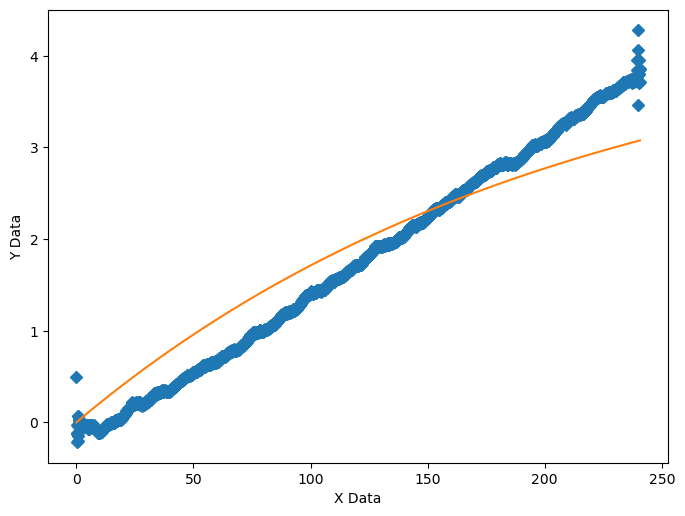

kon: 23561560.207603276


In [12]:
graphWidth = 800
graphHeight = 600
f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
axes = f.add_subplot(111)
axes.plot(xData, yData,  'D')
xModel = np.linspace(min(xData), max(xData))
yModel = func(xModel, parameters[0], parameters[1], conc, koff)
axes.plot(xModel, yModel)  
axes.set_xlabel('X Data') # X axis data label
axes.set_ylabel('Y Data') # Y axis data label
plt.show()
plt.close('all') # clean up after using pyplot
print('kon:', parameters[1])

In [10]:
modelPredictions = func(xData, parameters[0], parameters[1], conc, koff)
absError = modelPredictions - yData
SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

RMSE: 0.3575655575054849
R-squared: 0.9121237651256446
